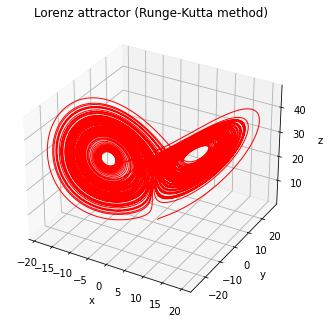

In [16]:
import sys
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


class lorenz63:
    dt            = 1e-3     # Differential interval
    tmax          = 100   # Time step count

    def __init__(self, X0=[1,1,1], p=10.0, r=28.0, b=8.0/3.0):
        self.p = p
        self.r = r 
        self.b = b 
        self.X0 = X0
        self.res = [[self.X0[0]],[self.X0[1]],[self.X0[2]]]

    def simulate(self):
        """ Loranz 63 model simulated in time """
        X = self.X0
        for _ in range( int(self.tmax/self.dt) ):
            k_0 = self.lorenz63f(X)
            k_1 = self.lorenz63f([ x + k * self.dt / 2 for x, k in zip(X, k_0) ])
            k_2 = self.lorenz63f([ x + k * self.dt / 2 for x, k in zip(X, k_1) ])
            k_3 = self.lorenz63f([ x + k * self.dt for x, k in zip(X, k_2) ])
            for i in range(3):
                X[i] += (k_0[i] + 2 * k_1[i] + 2 * k_2[i] + k_3[i]) * self.dt / 6.0
                self.res[i].append(X[i])
    
    
    def lorenz63f(self, X):
        """ Lorenz equation """
        return [
                -self.p * X[0] + self.p * X[1], 
                -X[0] * X[2] + self.r * X[0] - X[1], 
                X[0] * X[1] - self.b * X[2]
                ]


    def plot(self):
        """ Plotting """
        fig = plt.figure()
        ax = Axes3D(fig)
        ax.set_xlabel("x")
        ax.set_ylabel("y")
        ax.set_zlabel("z")
        ax.set_title("Lorenz attractor (Runge-Kutta method)")
        ax.plot(self.res[0], self.res[1], self.res[2], color="red", lw=1)
        plt.show()
    
    
    def getTimeSeries(self):
        return self.res
    
    def getTimeSeries(self,i):
        return self.res[i]



lorenz63 = lorenz63()
lorenz63.simulate()
lorenz63.plot()
